In [ ]:
!pip install dgl -f https://data.dgl.ai/wheels/repo.html

!pip install dglgo -f https://data.dgl.ai/wheels-test/repo.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.dgl.ai/wheels/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 30.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.dgl.ai/wheels-test/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
%matplotlib inline
import os

os.environ["DGLBACKEND"] = "pytorch"
import dgl
import numpy as np
import networkx as nx
import torch
import torch.nn as nn

Querying graph structure

In [ ]:
#create heterogeneous graph
data_dict = {
    ('user', 'follows', 'user'): (torch.tensor([0, 1]), torch.tensor([1, 2])),
    ('user', 'follows', 'topic'): (torch.tensor([1, 1]), torch.tensor([1, 2])),
    ('user', 'plays', 'game'): (torch.tensor([0, 3]), torch.tensor([3, 4]))
}
g = dgl.heterograph(data_dict)



In [ ]:
# create homogeneous graph
h = dgl.graph((torch.tensor([0, 0, 1, 1]), torch.tensor([1, 0, 2, 3])))


DGLGraph.num_node

In [ ]:
# Return the number of nodes in the graph.
# g.num_nodes = g.number_of_nodes

print(g.num_nodes('game'))  
print(g.num_nodes('user'))
print(g.num_nodes('topic'))

5
4
3


DGLGraph.num_edges

In [ ]:
# Return the number of edges in the graph.
# g.num_edges = g.number_of_edges

print(g.num_edges(('user','follows','user')))
print(g.num_edges(('user', 'follows', 'topic')))
print(g.num_edges(('user', 'plays', 'game')))

2
2
2


DGLGraph.num_src_nodes

In [ ]:
# Return the number of source nodes in the graph.
# g.num_src_nodes = g.number_of_src_nodes

print(g.num_src_nodes('game'))
print(g.num_src_nodes('user'))
print(g.num_src_nodes('topic'))

5
4
3


DGLGraph.num_dst_nodes

In [ ]:
# Return the number of destination nodes in the graph.
# g.num_dst_nodes = g.number_of_dst_nodes

print(g.num_dst_nodes('game'))
print(g.num_dst_nodes('user'))
print(g.num_dst_nodes('topic'))

5
4
3


DGLGraph.is_unibipartite

In [ ]:
# Return whether the graph is a uni-bipartite graph.

print(g.is_unibipartite)

False


DGLGraph.is_multigraph

In [ ]:
# Return whether the graph is a multigraph with parallel edges.
print(g.is_multigraph)

False


DGLGraph.is_homogeneous

In [ ]:
# Return whether the graph is a homogeneous graph.
print(g.is_homogeneous)
print(h.is_homogeneous)

False
True


DGLGraph.has_nodes  ##???

In [ ]:
# Return whether the graph contains the given nodes.
print(g.has_nodes(0, 'user'))
print(g.has_nodes(2, 'game')) ##?

True
True


DGLGraph.has_edges_between

In [ ]:
# Return whether the graph contains the given edges.
print(g.has_edges_between(torch.tensor([0]), torch.tensor([1]), 'plays'))
print(g.has_edges_between(torch.tensor([0]), torch.tensor([1]), ('user','follows', 'user')))

print(h.has_edges_between(torch.tensor([0, 0]), torch.tensor([0, 2])))

tensor([False])
tensor([True])
tensor([ True, False])


DGLGraph.successors

In [ ]:
# Return the successor(s) of a particular node with the specified edge type

print(g.successors(0, 'plays'))
print(g.successors(0, ('user', 'follows', 'user')))
print(g.successors(3, 'plays'))

print(h.successors(0))

tensor([3])
tensor([1])
tensor([4])
tensor([1, 0])


DGLGraph.predecessors

In [ ]:
# Return the predecessor(s) of a particular node with the specified edge type.

print(g.predecessors(4, 'plays'))
print(g.predecessors(2, ('user','follows', 'user')))
print(g.predecessors(2, ('user','follows', 'topic')))

print(h.predecessors(1))

tensor([3])
tensor([1])
tensor([1])
tensor([0])


DGLGraph.edge_ids

In [ ]:
# Return the edge ID(s) given the two endpoints of the edge(s).

print(g.edge_ids([0], [3], etype = 'plays'))
print(g.edge_ids([0], [1],etype = ('user','follows', 'user')))
print(g.edge_ids([1], [2],etype = ('user','follows', 'topic')))

print(h.edge_ids([1],[3]))
print(h.edge_ids([0, 0], [1, 0]))

tensor([0])
tensor([0])
tensor([1])
tensor([3])
tensor([0, 1])


DGLGraph.find_edges

In [ ]:
# Return the source and destination node ID(s) given the edge ID(s).
print(g.find_edges([1, 0], 'plays'))
print(g.find_edges([1, 0], ('user', 'follows', 'user')))

print(h.find_edges([1, 0]))

(tensor([3, 0]), tensor([4, 3]))
(tensor([1, 0]), tensor([2, 1]))
(tensor([0, 0]), tensor([0, 1]))


DGLGraph.in_edges

In [ ]:
# Return the incoming edges of the given nodes.

print(g.in_edges([3], etype = 'plays')) 
print(g.in_edges([2], etype = ('user','follows','user'))) 
print(g.in_edges([2,1], etype = ('user','follows','user')))

print(h.in_edges([1]))

(tensor([0]), tensor([3]))
(tensor([1]), tensor([2]))
(tensor([1, 0]), tensor([2, 1]))
(tensor([0]), tensor([1]))


DGLGraph.out_edges

In [ ]:
# Return the outgoing edges of the given nodes.

print(g.out_edges([3], etype = 'plays'))

print(h.out_edges([0]))

(tensor([3]), tensor([4]))
(tensor([0, 0]), tensor([1, 0]))


DGLGraph.in_degrees

In [ ]:
# Return the in-degree(s) of the given nodes.
print(g.in_degrees([3,4], 'plays'))
print(g.in_degrees([2] ,('user', 'follows', 'topic')))

print(h.in_degrees([0, 3]))

tensor([1, 1])
tensor([1])
tensor([1, 1])


DGLGraph.out_degrees

In [ ]:
# Return the out-degree(s) of the given nodes.
print(g.out_degrees([3], 'plays'))
print(g.out_degrees([2] ,('user', 'follows', 'topic')))

print(h.out_degrees([0, 3]))

tensor([1])
tensor([0])
tensor([2, 0])


Querying and manipulating node/edge ID type

DGLGraph.idtype

In [ ]:
# The data type for storing the structure-related graph information such as node and edge IDs.
g.idtype

torch.int64

In [ ]:
g = dgl.heterograph(data_dict, idtype = torch.int32)
g.idtype

torch.int32

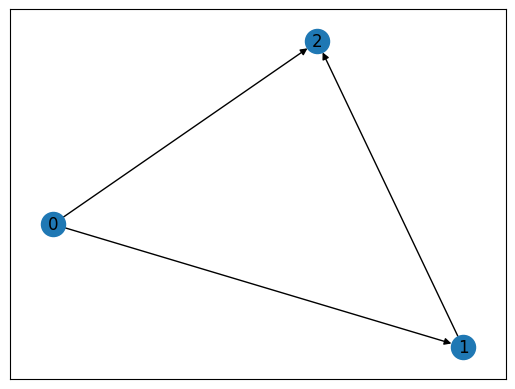

In [ ]:
g = dgl.graph((torch.tensor([0, 0, 1]).int(), torch.tensor([1, 2, 2]).int())) ##??
nx.draw_networkx(g.to_networkx(), with_labels = 1)

In [ ]:
g.ndata['feature'] = torch.randn(3, 1)
g.ndata

{'feature': tensor([[-1.0897],
        [ 0.4795],
        [-0.4997]])}

DGLGraph.long & DGLGraph.int  ##???

In [ ]:
#???
g_long = g.long()
g_int = g.int()
print(g_long.idtype)
print(g.idtype)
print(g_int.idtype)

torch.int64
torch.int32
torch.int32


Using Node/edge features

In [ ]:
data_dict = {
    ('user', 'follows', 'user'): (torch.tensor([0, 1]), torch.tensor([1, 2])),
    ('user', 'follows', 'topic'): (torch.tensor([1, 1]), torch.tensor([1, 2])),
    ('user', 'plays', 'game'): (torch.tensor([0, 3]), torch.tensor([3, 4]))
}
g = dgl.heterograph(data_dict)

h = dgl.graph((torch.tensor([0, 0, 1, 1]), torch.tensor([1, 0, 2, 3])))

DGLGraph.nodes  ##???

In [ ]:
# Return a node view

#Get the node ID
print(h.nodes())
print(g.nodes('user'))
print(g.nodes('topic'))
print(g.nodes('game'))

#Set and get a feature for all nodes of  single type
g.nodes('game').data['feature'] = torch.ones(5, 1)  ##???


tensor([0, 1, 2, 3])
tensor([0, 1, 2, 3])
tensor([0, 1, 2])
tensor([0, 1, 2, 3, 4])


IndexError: ignored

DGLGraph.ndata

In [ ]:
#Return a node data view for setting/getting node features
h.ndata['feature 1'] = torch.ones(4, 1)
print(h.ndata['feature 1'])

h.ndata['feature 2'] = torch.zeros(4, 2)
print(h.ndata['feature 2'])

g.ndata['feature'] = {'game': torch.zeros(5, 1), 'user':torch.ones(4,1)}
g.ndata['feature']

tensor([[1.],
        [1.],
        [1.],
        [1.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])


{'game': tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]]),
 'user': tensor([[1.],
         [1.],
         [1.],
         [1.]])}

DGLGraph.edges

In [ ]:
#Return an edge view
print(g.edges(etype = 'plays'))
print(g.edges(etype = ('user','follows', 'user')))
print(g.edges(etype = ('user', 'follows', 'topic')))

print(h.edges())


#Set and get a feature for all nodes of  single type
g.edges['plays'].data['feature'] = torch.ones(2,1)
print(g.edges['plays'].data['feature'] )

(tensor([0, 3]), tensor([3, 4]))
(tensor([0, 1]), tensor([1, 2]))
(tensor([1, 1]), tensor([1, 2]))


(tensor([0, 0, 1, 1]), tensor([1, 0, 2, 3]))


tensor([[1.],
        [1.]])


DGLGraph.edata

In [ ]:
# Return an edge data view for setting/getting edge features.

g.edata['feature 1'] = {('user', 'follows', 'user') :torch.zeros(2,1),
                              ('user', 'follows', 'topic'): torch.ones(2, 2),
                              ('user', 'plays', 'game'):torch.randn(2, 1)}
print(g.edata['feature 1'])

h.edata['feature'] = torch.randn(4, 2)
print(h.edata['feature'])

{('user', 'follows', 'topic'): tensor([[1., 1.],
        [1., 1.]]), ('user', 'follows', 'user'): tensor([[0.],
        [0.]]), ('user', 'plays', 'game'): tensor([[ 1.5927],
        [-1.6394]])}
tensor([[-0.0196, -0.9095],
        [-1.6711,  0.9188],
        [-0.2426, -1.8675],
        [-0.1991,  0.4421]])


In [ ]:
h.num_edges()


4

DGLGraph.node_attr_schemes

In [ ]:
#Return the node feature schemes for the specified type.
print(g.node_attr_schemes('topic'))
print(g.node_attr_schemes('user'))
print(g.node_attr_schemes('game'))
print(h.node_attr_schemes())

{}
{'feature': Scheme(shape=(1,), dtype=torch.float32)}
{'feature': Scheme(shape=(1,), dtype=torch.float32)}
{'feature': Scheme(shape=(1,), dtype=torch.float32), 'feature 1': Scheme(shape=(1,), dtype=torch.float32), 'feature 2': Scheme(shape=(2,), dtype=torch.float32)}


DGLGraph.edge_attr_schemes

In [ ]:
#Return the edge feature schemes for the specified type.
print(g.edge_attr_schemes('plays'))
print(g.edge_attr_schemes(('user', 'follows', 'user')))
print(g.edge_attr_schemes(('user', 'follows', 'topic')))

print(h.edge_attr_schemes())

{'feature': Scheme(shape=(1,), dtype=torch.float32), 'feature 1': Scheme(shape=(1,), dtype=torch.float32)}
{'feature 1': Scheme(shape=(1,), dtype=torch.float32)}
{'feature 1': Scheme(shape=(2,), dtype=torch.float32)}
{'feature': Scheme(shape=(2,), dtype=torch.float32)}


DGLGraph.srcnodes  & DGLGraph.srcnodes ##???

In [ ]:
#Return a node view for source nodes
#Return a node view for destination nodes

print(g.srcnodes('user')) ##??

tensor([0, 1, 2, 3])


DGLGraph.srcdata & DGLGraph.dstdata

In [ ]:
#Return a node data view for setting/getting source node features.
#Return a node data view for setting/getting source node features.

g.srcdata['h'] = {'user':torch.zeros(4,1)}
print(g.srcdata['h'])

g.dstdata['h'] = {'user':torch.ones(4, 1),
                  'topic':torch.zeros(3, 1),
                  'game':torch.zeros(5, 1)}
print(g.dstdata['h']) 

{'user': tensor([[0.],
        [0.],
        [0.],
        [0.]])}
{'game': tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]), 'topic': tensor([[0.],
        [0.],
        [0.]]), 'user': tensor([[1.],
        [1.],
        [1.],
        [1.]])}


Transforming graph

In [ ]:
data_dict = {
    ('user', 'follows', 'user'): (torch.tensor([0, 1]), torch.tensor([1, 2])),
    ('user', 'follows', 'topic'): (torch.tensor([1, 1]), torch.tensor([1, 2])),
    ('user', 'plays', 'game'): (torch.tensor([0, 3]), torch.tensor([3, 4]))
}
g = dgl.heterograph(data_dict)

h = dgl.graph((torch.tensor([0, 0, 1, 1]), torch.tensor([1, 0, 2, 3])))

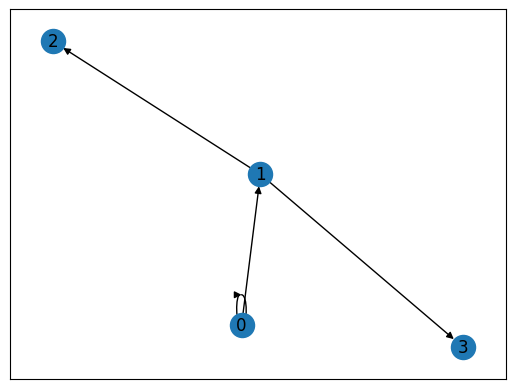

In [ ]:
nx.draw_networkx(h.to_networkx(), with_labels = 1)

DGLGraph.subgraph  &  DGLGraph.edge_subgraph  ##??

In [ ]:
sub_h = h.subgraph([0, 1]) ##??

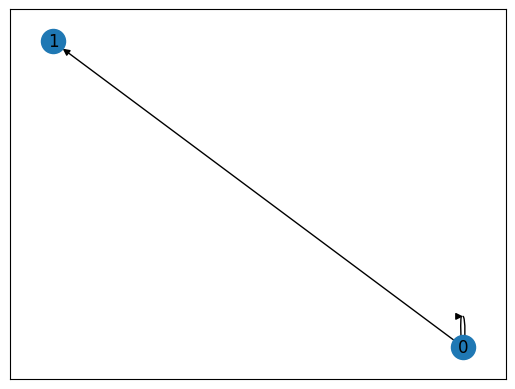

In [ ]:
nx.draw_networkx(sub_h.to_networkx(), with_labels = 1)

In [ ]:
g = dgl.graph(([0, 1, 2, 3, 4], [1, 2, 3, 4, 0]))  
sg = g.subgraph([0, 1, 3])

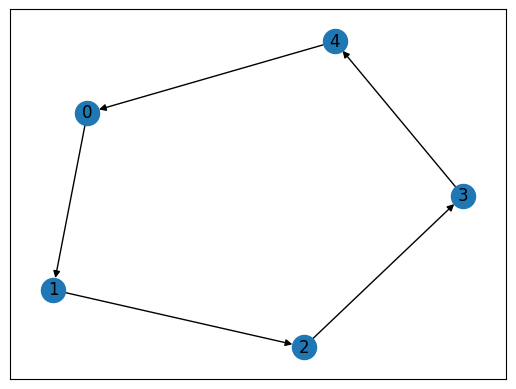

In [ ]:
nx.draw_networkx(g.to_networkx(), with_labels = 1)

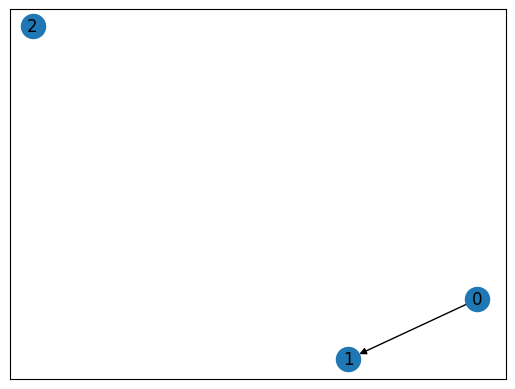

In [ ]:
nx.draw_networkx(sg.to_networkx(), with_labels = 1)

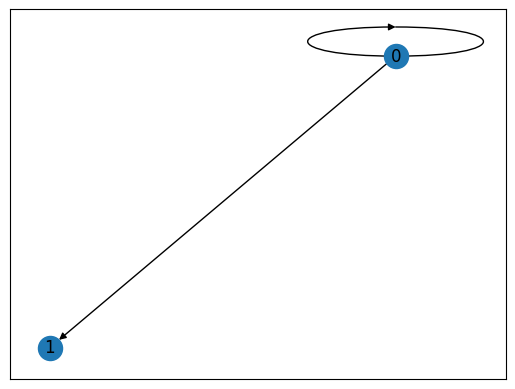

In [ ]:
sub_h = h.edge_subgraph([0, 1]) 
nx.draw_networkx(sub_h.to_networkx(), with_labels = 1)

DGLGraph.node_type_subgraph & DGLGraph.edge_type_subgraph ##??

In [ ]:
# Return the subgraph induced on given node types.
# g.node_type_subgraph =  dgl.node_type_subgraph()

sub_g_n = g.node_type_subgraph(['user']) ##??
print(sub_g_n)

sub_g_e = g.edge_type_subgraph(['plays']) ##??
print(sub_g_e)

Graph(num_nodes=4, num_edges=2,
      ndata_schemes={}
      edata_schemes={})
Graph(num_nodes={'game': 5, 'user': 4},
      num_edges={('user', 'plays', 'game'): 2},
      metagraph=[('user', 'game', 'plays')])


DGLGraph.__getitem__

In [ ]:
# Return the relation slice of this graph.

data_dict = {
    ('user', 'follows', 'user'): (torch.tensor([0, 1]), torch.tensor([1, 2])),
    ('user', 'follows', 'topic'): (torch.tensor([1, 1]), torch.tensor([1, 2])),
    ('user', 'plays', 'game'): (torch.tensor([0, 3]), torch.tensor([3, 4]))
}
g = dgl.heterograph(data_dict)


In [ ]:
new_g1= g['user', :, 'user']
new_g1

Graph(num_nodes=4, num_edges=2,
      ndata_schemes={}
      edata_schemes={})

In [ ]:
new_g2 = g[:,'follows', 'topic']
new_g2

Graph(num_nodes={'user': 4, 'topic': 3},
      num_edges={('user', 'follows', 'topic'): 2},
      metagraph=[('user', 'topic', 'follows')])

In [ ]:
new_g3 = g[:, 'follows',:]
new_g3

Graph(num_nodes={'user': 4, 'topic+user': 7},
      num_edges={('user', 'follows+follows', 'topic+user'): 4},
      metagraph=[('user', 'topic+user', 'follows+follows')])

DGLGraph.line_graph  ##??

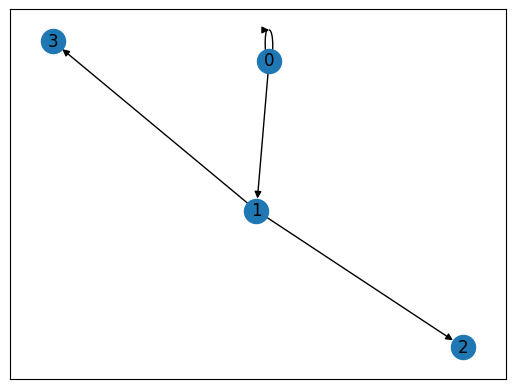

In [ ]:
# Return the line graph of this graph.
# DGLGraph.line_graph = dgl.line_graph
# for homogeneous graph

h = dgl.graph((torch.tensor([0, 0, 1, 1]), torch.tensor([1, 0, 2, 3])))
lh = h.line_graph() ##??
nx.draw_networkx(h.to_networkx(), with_labels = 1)

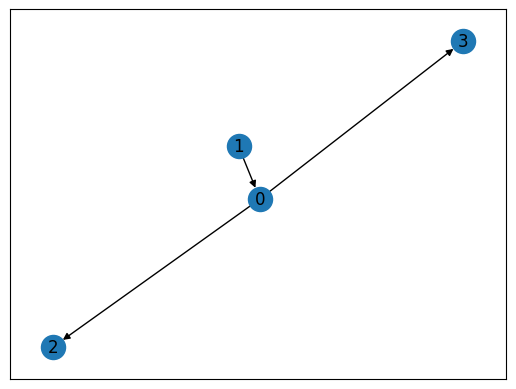

In [ ]:
nx.draw_networkx(lh.to_networkx(), with_labels = 1)

DGLGraph.add_self_loop  ##??

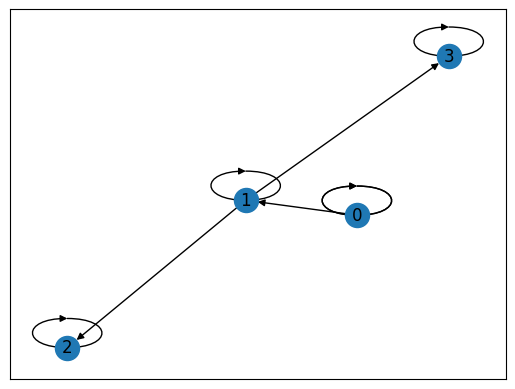

In [33]:
# Add self-loops for each node in the graph and return a new graph.
# DGLGraph.add_self_loop = dgl.add_self_loop()

h = dgl.graph((torch.tensor([0, 0, 1, 1]), torch.tensor([1, 0, 2, 3])))
h.ndata['nfeat'] = torch.ones(4)
h.edata['efeat'] = torch.randn(4)
sh = h.add_self_loop(fill_data= 'sum')  ##??
nx.draw_networkx(sh.to_networkx(), with_labels = 1)

DGLGraph.remove_self_loop

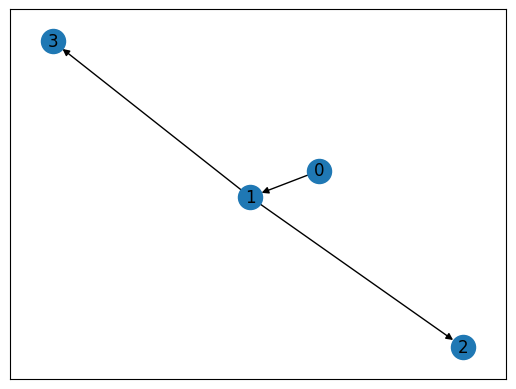

In [34]:
# Remove self-loops for each node in the graph and return a new graph.
# DGLGraph.remove_self_loop = dgl.remove_self_loop

h = dgl.graph((torch.tensor([0, 0, 1, 1]), torch.tensor([1, 0, 2, 3])))
h.edata['efeat'] = torch.randn(4)
rh = h.remove_self_loop() 
nx.draw_networkx(rh.to_networkx(), with_labels = 1)

DGLGraph.to_simple

In [37]:
# Convert a graph to a simple graph without parallel edges and return.
# DGLGraph.to_simple = dgl.to_simple

# for homogeneous graph
h = dgl.graph(([0, 1, 2, 1],[1, 2, 0, 2]))
sh = dgl.to_simple(h)

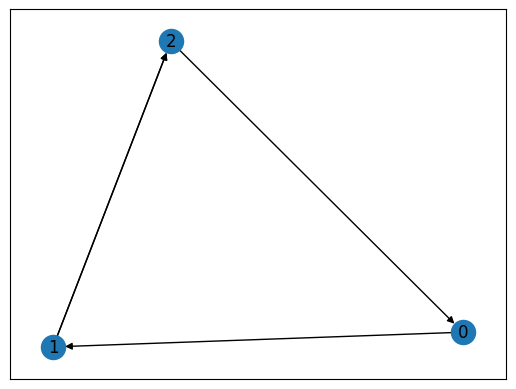

In [38]:
nx.draw_networkx(h.to_networkx(), with_labels = 1)

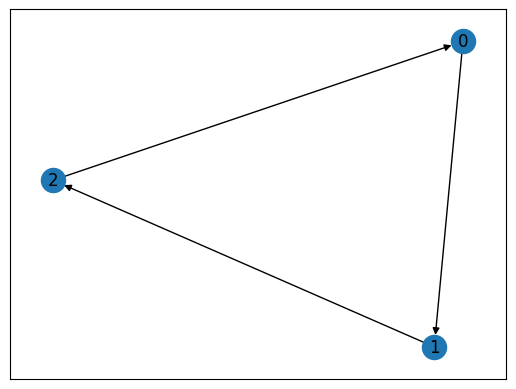

In [39]:
nx.draw_networkx(sh.to_networkx(), with_labels = 1)

DGLGraph.reorder_graph

In [41]:
# Return a new graph with nodes and edges re-ordered/re-labeled according to
# the specified permute algorithm.
# Support homogeneous graph only for the moment.

h = dgl.graph((torch.tensor([0, 0, 1, 1]), torch.tensor([1, 0, 2, 3])))

#Reorder according to 'rcmk' permute algorithm.
rh = h.reorder_graph(node_permute_algo= 'rcmk')

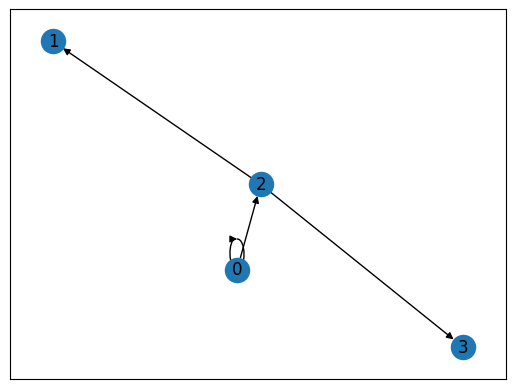

In [42]:
nx.draw_networkx(rh.to_networkx(), with_labels = 1)

dgl.in_subgraph ##??

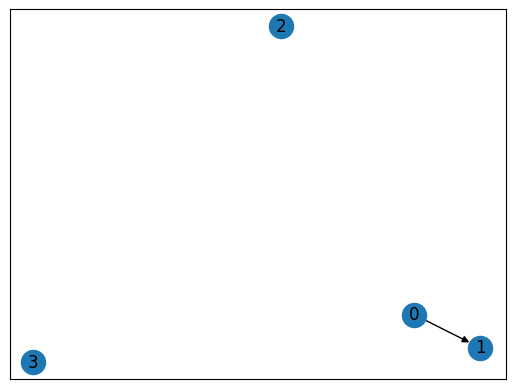

In [49]:
# Return the subgraph induced on the inbound edges of all the edge types of the given nodes.
h = dgl.graph((torch.tensor([0, 0, 1, 1]), torch.tensor([1, 0, 2, 3])))
sh = h.in_subgraph([1, 0]) ## induced , loop ??
nx.draw_networkx(sh.to_networkx(), with_labels = 1)

dgl.out_subgraph

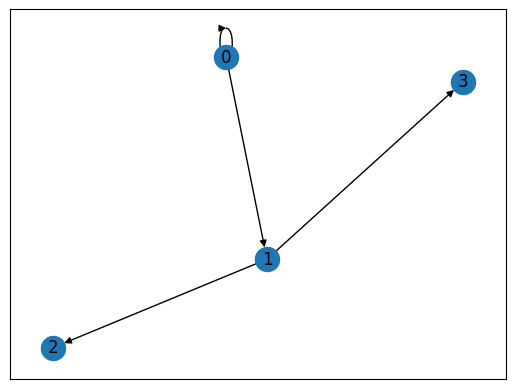

In [53]:
# Return the subgraph induced on the outbound  edges of all the edge types of the given nodes.
h = dgl.graph((torch.tensor([0, 0, 1, 1]), torch.tensor([1, 0, 2, 3])))
sh = h.out_subgraph([2, 3])
nx.draw_networkx(sh.to_networkx(), with_labels = 1)

dgl.khop_out_subgraph & dgl.khop_in_subgraph ##??

In [57]:
# Return the subgraph induced by k-hop out-neighborhood of the specified node(s).
h = dgl.graph((torch.tensor([0, 0, 1, 1]), torch.tensor([1, 0, 2, 3])))
sh = h.khop_out_subgraph(0, k=2) ##??

In [60]:
from dgl.data.utils import save_graphs
save_graphs("./data.bin", [g, h])

In [61]:
from dgl.data.utils import load_graphs
glist = load_graphs("./data.bin")